In [1]:
from pykrx import stock
import mpl_finance

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import arrow

/Users/minseop/.pyenv/versions/3.8.5/envs/env_stock_bot/lib/python3.8/site-packages/mpl_finance.py:16: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  __warnings.warn('\n\n  ================================================================='+


In [2]:
# constant variables
TRAINING_DAYS = 90
DATE_TICK_RANGE = int(TRAINING_DAYS/9)

In [3]:
# ticker=005930: Samsung Electronics
end_date = arrow.utcnow().shift(hours=9).format('YYYYMMDD')
start_date = arrow.get(end_date).shift(days=-TRAINING_DAYS).format('YYYYMMDD')

df_samsung = stock.get_market_ohlcv_by_date(fromdate=start_date, todate=end_date, ticker='005930')
df_hynix = stock.get_market_ohlcv_by_date(fromdate=start_date, todate=end_date, ticker='000660')

In [4]:
def draw_candle_chart(df_stock_info):
    fig = plt.figure(figsize=(16, 8))
    ax = fig.add_subplot(111)

    day_list = range(len(df_stock_info))
    name_list = []

    cnt = 0
    for day in df_stock_info.index:
        name_list.append(arrow.get(day).format('YYYY-MM-DD')) if cnt % DATE_TICK_RANGE == 0 else name_list.append('')
        cnt = cnt + 1

    ax.xaxis.set_major_locator(ticker.FixedLocator(day_list))
    ax.xaxis.set_major_formatter(ticker.FixedFormatter(name_list))

    mpl_finance.candlestick2_ohlc(ax, df_stock_info['시가'], df_stock_info['고가'],
                                  df_stock_info['저가'], df_stock_info['종가'], width=0.5, colorup='r', colordown='b')
    plt.show()

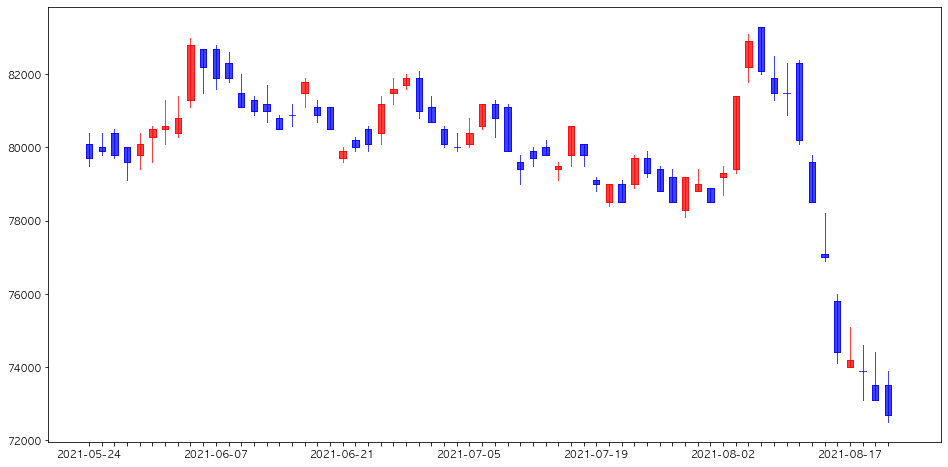

In [5]:
draw_candle_chart(df_samsung)

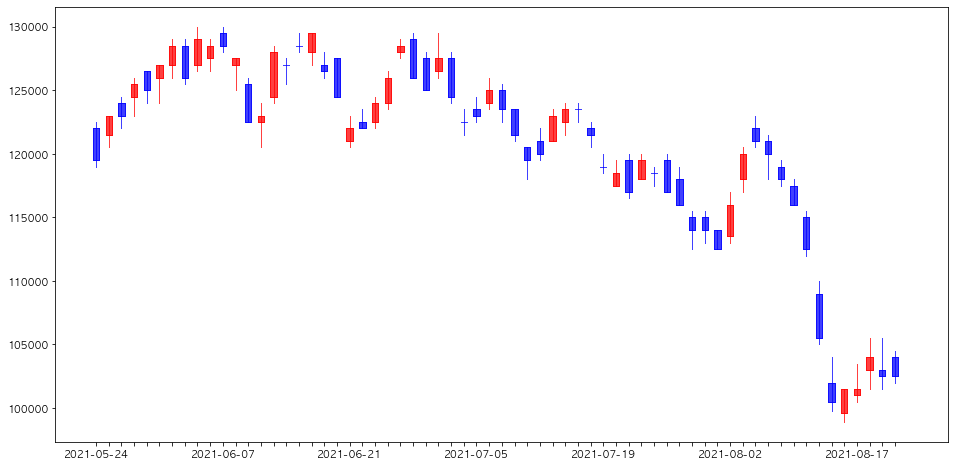

In [6]:
draw_candle_chart(df_hynix)